 ## Average income

In [1]:
# import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor , XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# red data 
df = pd.read_csv('data_aconomic.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633,NaN


In [3]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              132
                 ... 
2018                9
2019               11
2020               14
2021               21
2022              266
Length: 67, dtype: int64

##  Now we modify the data and analysis

In [4]:
# We change the column names to make it easier to deal with
df.rename(columns={'1960': 'y1960','1961': 'y1961','1962':'y1962','1963':'y1963','1964':'y1964','1965':'y1965','1966':'y1966','1967':'y1967',
                   '1968':'y1968','1969':'y1969','1970':'y1970','1971':'y1971','1972':'y1972','1973':'y1973',
                   '1974':'y1974','1975':'y1975','1976':'y1976','1977':'y1977','1978':'y1978','1979':'y1979',
                   '1980':'y1980','1981':'y1981','1982':'y1982','1983':'y1983','1984':'y1984','1985':'y1985',
                   '1986':'y1986','1987':'y1987','1988':'y1988','1989':'y1989','1990':'y1990','1991':'y1991',
                   '1992':'y1992','1993':'y1993','1994':'y1994','1995':'y1995','1996':'y1996','1997':'y1997',
                   '1998':'y1998','1999':'y1999','2000':'y2000','2001':'y2001','2002':'y2002','2003':'y2003',
                   '2004':'y2004','2005':'y2005','2006':'y2006','2007':'y2007','2008':'y2008','2009':'y2009',
                   '2010':'y2010','2011':'y2011','2012':'y2012','2013':'y2013','2014':'y2014','2015':'y2015',
                   '2016':'y2016','2017':'y2017','2018':'y2018','2019':'y2019','2020':'y2020','2021':'y2021'},
          inplace=True, errors='raise')

In [5]:
df.rename(columns={'Country Name': 'Country_Name',
                   'Country Code': 'Country_Code','Indicator Name':'Indicator_Name','Indicator Code':'Indicator_Code','2022':'y2022'},
          inplace=True, errors='raise')

In [6]:
df.drop(['Indicator_Code','Indicator_Name','Country_Name','y2022'], axis = 1, inplace = True) 

In [7]:
df

,Country_Code,y1960,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,AFE,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
263,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,ZMB,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


### Here we are faced with a big problem, which is a lot of empty values with little available data
### It is income data, so we will search for the average for each year and replace the blank values with it

In [8]:
# It is income data, so we will search for the average for each year and replace the blank values with it
df.y2021.describe()

count       245.000000
mean      16882.489858
std       26113.588997
min         221.477676
25%        2304.844567
50%        6621.574336
75%       18751.026510
max      234315.460500
Name: y2021, dtype: float64

In [9]:
# We replace the blank values
df.y1960.fillna(40.119192, inplace = True) , df.y1961.fillna(26.318449, inplace = True) , df.y1962.fillna(26.983496, inplace = True)

df.y1963.fillna(28.434172, inplace = True) , df.y1964.fillna(20.018579, inplace = True) , df.y1965.fillna(16.577652, inplace = True)

df.y1966.fillna(12.900238, inplace = True) , df.y1967.fillna(12.900238, inplace = True) , df.y1968.fillna(20.395642, inplace = True)

df.y1969.fillna(20.682296, inplace = True) , df.y1970.fillna(21.220872, inplace = True) , df.y1971.fillna(20.038664, inplace = True)

df.y1972.fillna(22.223529, inplace = True) , df.y1973.fillna(22.870928, inplace = True) , df.y1974.fillna(33.630011, inplace = True)

df.y1975.fillna(37.189382, inplace = True) , df.y1976.fillna(37.347918, inplace = True) , df.y1977.fillna(31.702217, inplace = True)

df.y1978.fillna(28.488350, inplace = True) , df.y1979.fillna(28.015702, inplace = True) , df.y1980.fillna(30.197915, inplace = True)

df.y1981.fillna(31.218546, inplace = True) , df.y1982.fillna(37.495814, inplace = True) , df.y1983.fillna(40.289049, inplace = True)

df.y1984.fillna(37.464196, inplace = True) , df.y1985.fillna(35.542328, inplace = True) , df.y1986.fillna(42.320940, inplace = True)

df.y1987.fillna(37.872972, inplace = True) , df.y1988.fillna(35.827366, inplace = True) , df.y1989.fillna(42.411951, inplace = True)

df.y1990.fillna(50.782948, inplace = True) , df.y1991.fillna(22.850371, inplace = True) , df.y1992.fillna(30.114316, inplace = True)

df.y1993.fillna(53.480235, inplace = True) , df.y1994.fillna(90.264448, inplace = True) , df.y1995.fillna(113.788169, inplace = True)

df.y1996.fillna(130.816496, inplace = True) , df.y1997.fillna(128.105720, inplace = True) , df.y1998.fillna(103.626838, inplace = True)

df.y1999.fillna(99.757251, inplace = True) , df.y2000.fillna(122.962294, inplace = True) , df.y2001.fillna(119.261857, inplace = True)

df.y2002.fillna(110.460875, inplace = True) , df.y2003.fillna(114.367007, inplace = True) , df.y2004.fillna(128.538422, inplace = True)

df.y2005.fillna(151.188536, inplace = True) , df.y2006.fillna(166.276238, inplace = True) , df.y2007.fillna(170.706874, inplace = True)

df.y2008.fillna(194.710640, inplace = True) , df.y2009.fillna(204.544750, inplace = True) , df.y2010.fillna(222.660589, inplace = True)

df.y2011.fillna(236.451354, inplace = True) , df.y2012.fillna(238.205949, inplace = True) , df.y2013.fillna(241.547671, inplace = True)

df.y2014.fillna(257.818552, inplace = True) , df.y2015.fillna(289.359633, inplace = True) , df.y2016.fillna(242.065671, inplace = True)

df.y2017.fillna(243.135809, inplace = True) , df.y2018.fillna(231.446476, inplace = True) , df.y2019.fillna(216.972968, inplace = True)

df.y2020.fillna(216.826741, inplace = True) , df.y2021.fillna(221.477676, inplace = True) 

(None, None)

In [10]:
#We make sure that the values have been replaced
df.isnull().sum().head(60)

Country_Code    0
y1960           0
y1961           0
y1962           0
y1963           0
y1964           0
y1965           0
y1966           0
y1967           0
y1968           0
y1969           0
y1970           0
y1971           0
y1972           0
y1973           0
y1974           0
y1975           0
y1976           0
y1977           0
y1978           0
y1979           0
y1980           0
y1981           0
y1982           0
y1983           0
y1984           0
y1985           0
y1986           0
y1987           0
y1988           0
y1989           0
y1990           0
y1991           0
y1992           0
y1993           0
y1994           0
y1995           0
y1996           0
y1997           0
y1998           0
y1999           0
y2000           0
y2001           0
y2002           0
y2003           0
y2004           0
y2005           0
y2006           0
y2007           0
y2008           0
y2009           0
y2010           0
y2011           0
y2012           0
y2013           0
y2014     

In [11]:
df

,Country_Code,y1960,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,ABW,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,AFE,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,AGO,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
262,YEM,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,216.972968,216.826741,221.477676
263,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,ZMB,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


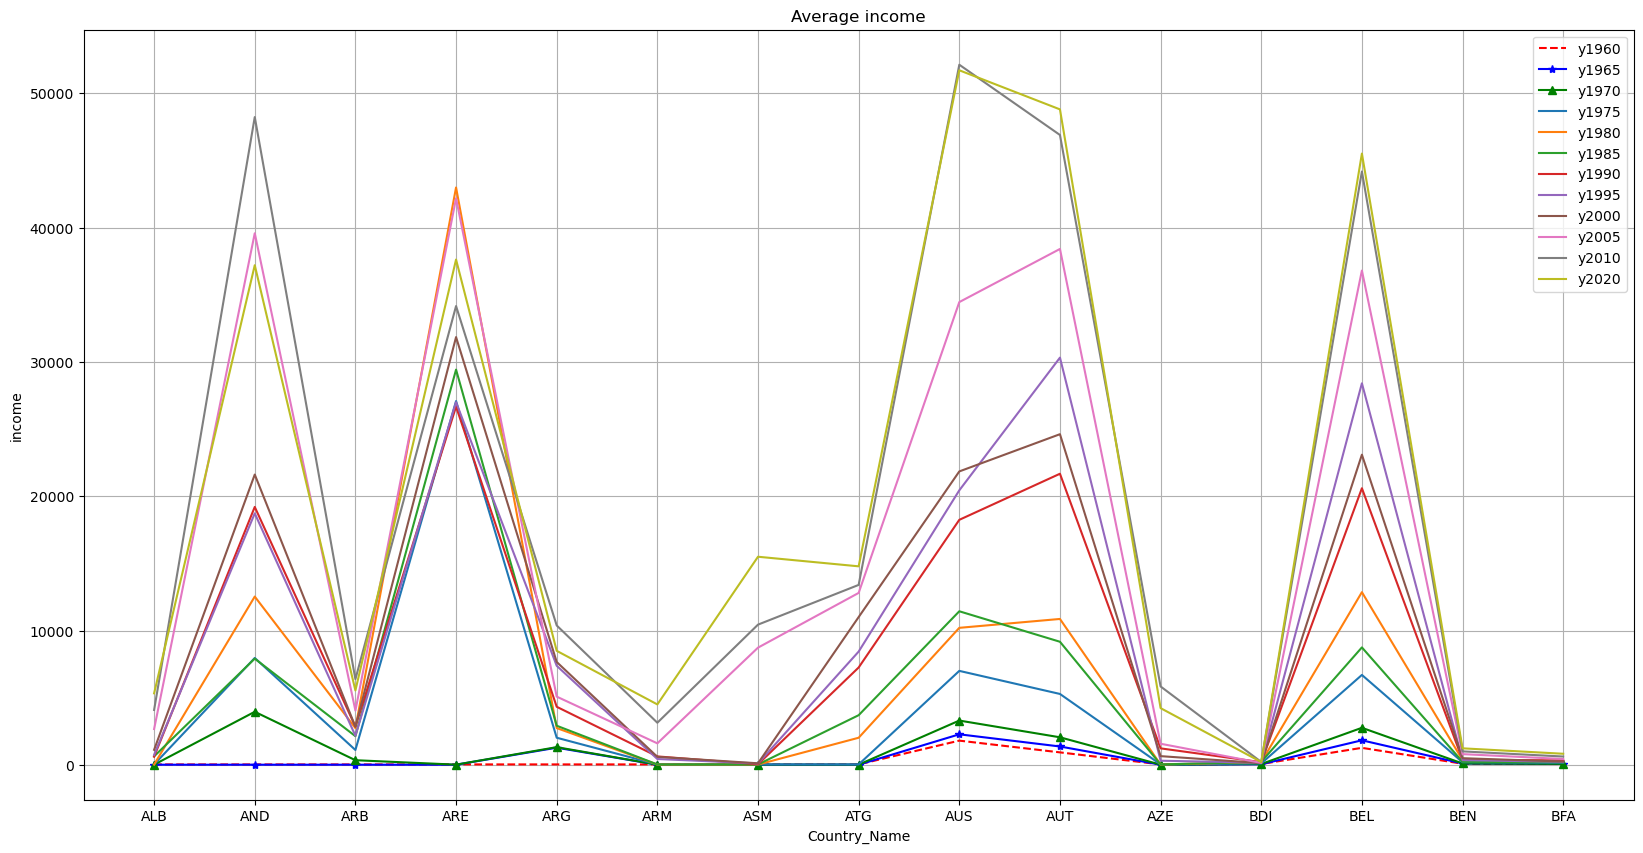

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('Country_Name')
plt.ylabel('income')
plt.title('Average income')
plt.plot(df.Country_Code[5:20],df.y1960[5:20],'r--',label="y1960")
plt.plot(df.Country_Code[5:20],df.y1965[5:20],'b-*',label="y1965")
plt.plot(df.Country_Code[5:20],df.y1970[5:20],'g-^',label="y1970")
plt.plot(df.Country_Code[5:20],df.y1975[5:20],label="y1975")
plt.plot(df.Country_Code[5:20],df.y1980[5:20],label="y1980")
plt.plot(df.Country_Code[5:20],df.y1985[5:20],label="y1985")
plt.plot(df.Country_Code[5:20],df.y1990[5:20],label="y1990")
plt.plot(df.Country_Code[5:20],df.y1995[5:20],label="y1995")
plt.plot(df.Country_Code[5:20],df.y2000[5:20],label="y2000")
plt.plot(df.Country_Code[5:20],df.y2005[5:20],label="y2005")
plt.plot(df.Country_Code[5:20],df.y2010[5:20],label="y2010")
plt.plot(df.Country_Code[5:20],df.y2020[5:20],label="y2020")
plt.grid(True)
plt.legend()
plt.show()

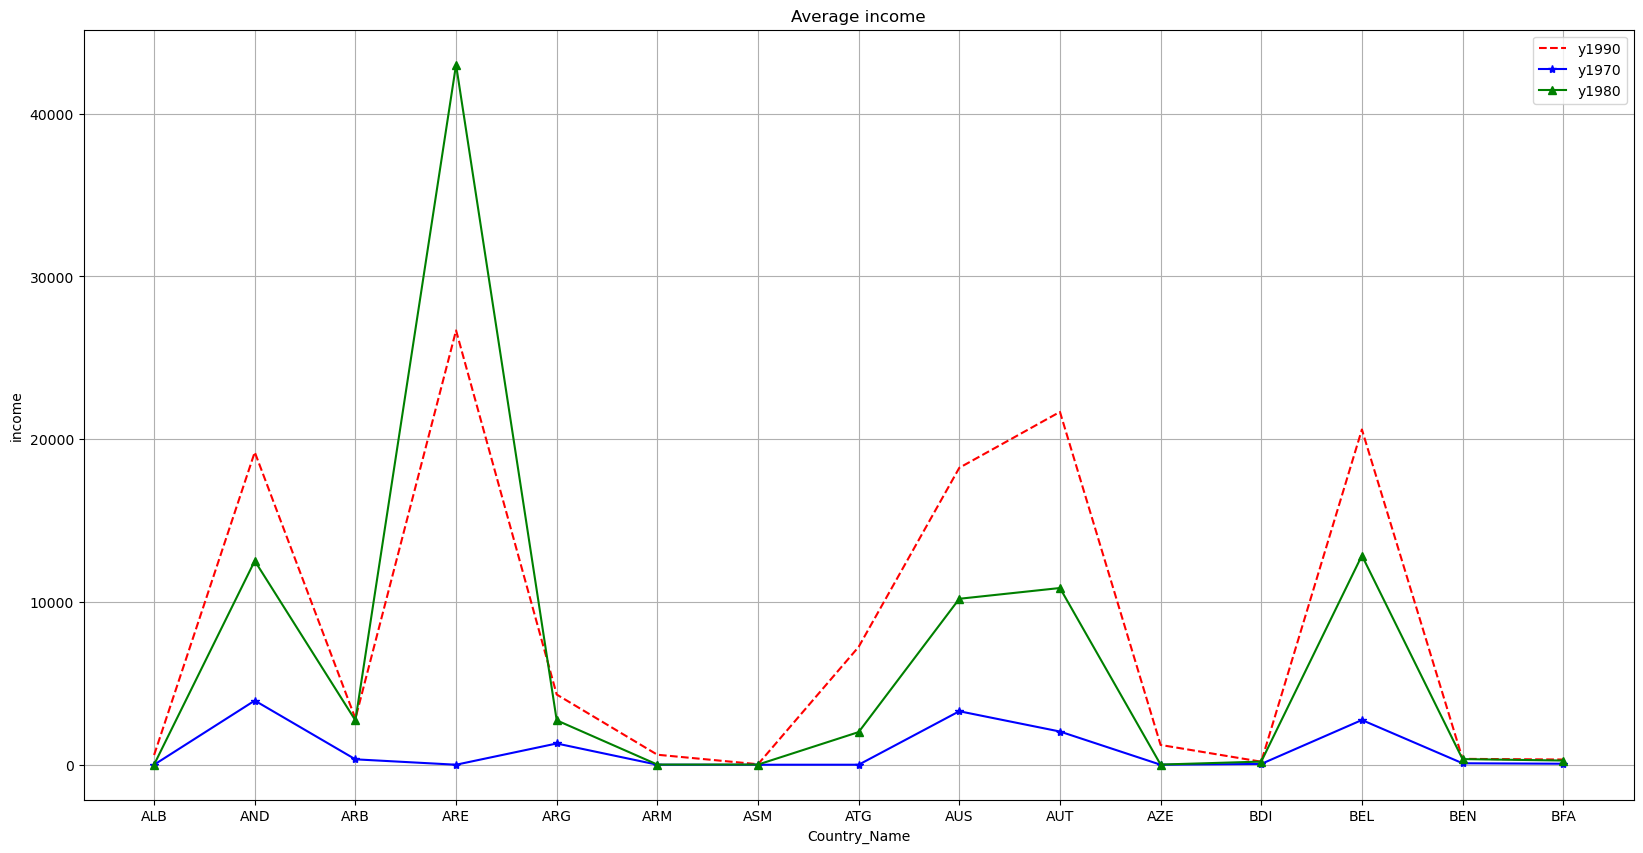

In [15]:
# We visualize the income difference in different time periods
plt.figure(figsize=(20,10))
plt.xlabel('Country_Name')
plt.ylabel('income')
plt.title('Average income')
plt.plot(df.Country_Code[5:20],df.y1990[5:20],'r--',label="y1990")
plt.plot(df.Country_Code[5:20],df.y1970[5:20],'b-*',label="y1970")
plt.plot(df.Country_Code[5:20],df.y1980[5:20],'g-^',label="y1980")
plt.grid(True)
plt.legend()
plt.show()

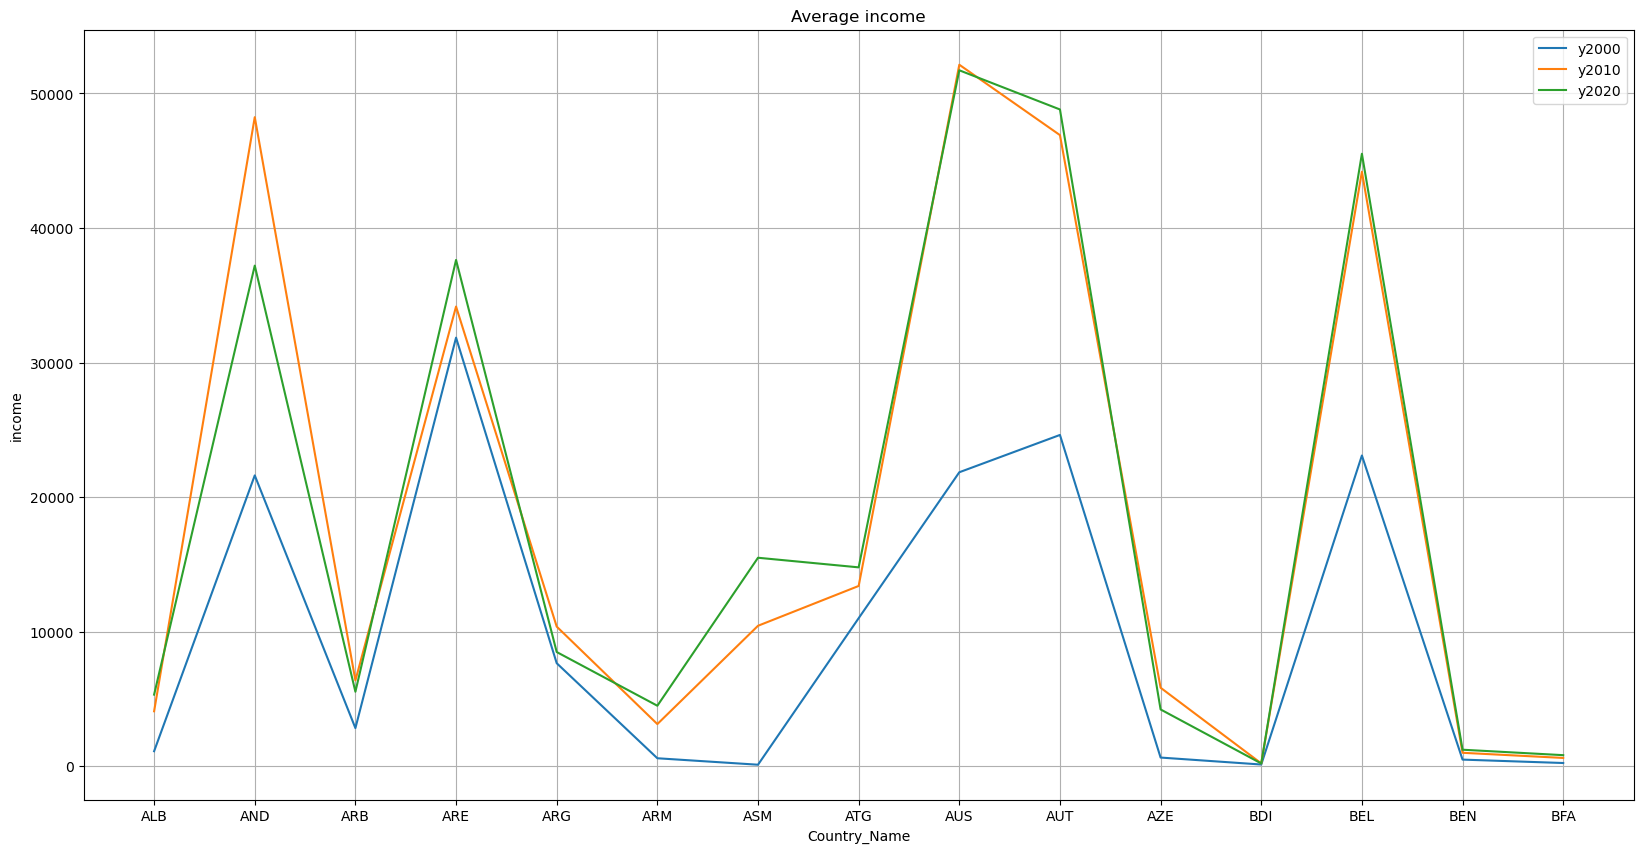

In [16]:
plt.figure(figsize=(20,10))
plt.xlabel('Country_Name')
plt.ylabel('income')
plt.title('Average income')
plt.plot(df.Country_Code[5:20],df.y2000[5:20],label="y2000")
plt.plot(df.Country_Code[5:20],df.y2010[5:20],label="y2010")
plt.plot(df.Country_Code[5:20],df.y2020[5:20],label="y2020")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
df.shape

(266, 63)

In [15]:
df.describe()

,y1960,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,258.443931,261.553408,277.706244,294.685876,314.362484,370.313932,407.382133,424.307410,450.444316,487.366311,...,15767.148538,16334.465958,16704.217497,14968.961588,15064.118370,15837.756055,16766.002533,16528.205145,14955.511351,15567.146791
std,485.152013,508.513461,536.759368,568.776607,623.687723,708.607182,775.464070,807.114959,838.274986,904.997650,...,23677.685502,25185.130955,25772.109339,23164.797279,23347.816934,24157.077438,25720.782787,25477.772609,23678.145737,25458.625507
min,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.786964,12.900238,20.395642,20.682296,...,238.205949,241.547671,257.818552,289.359633,242.065671,243.135809,231.446476,216.972968,216.826741,221.477676
25%,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,20.682296,...,1834.042544,1900.909226,2007.378756,1752.623870,1710.706739,1887.921830,1927.813635,1908.405518,1717.136055,1689.457207
50%,42.560714,46.998043,53.827514,53.571038,55.531254,101.928879,105.483599,105.348016,125.338591,131.973764,...,6175.043429,6423.712076,6607.495074,5918.392573,5809.830925,6178.518434,6417.816539,6442.317393,5556.713987,5658.465034
75%,218.095903,200.764829,221.914904,233.413339,239.252403,278.134970,306.312254,324.532764,327.684819,356.786668,...,18441.908290,18873.492885,19931.832605,17788.548927,17778.906468,18722.862975,19689.341265,19141.251360,16691.668903,17592.291048
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4081.915955,4229.254573,4336.426587,4695.923390,5032.144743,...,165505.178100,185066.578100,195780.006900,170337.924400,174610.637000,173612.864600,194280.822100,199377.481800,182538.638300,234315.460500


In [16]:
# Some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Code  266 non-null    object 
 1   y1960         266 non-null    float64
 2   y1961         266 non-null    float64
 3   y1962         266 non-null    float64
 4   y1963         266 non-null    float64
 5   y1964         266 non-null    float64
 6   y1965         266 non-null    float64
 7   y1966         266 non-null    float64
 8   y1967         266 non-null    float64
 9   y1968         266 non-null    float64
 10  y1969         266 non-null    float64
 11  y1970         266 non-null    float64
 12  y1971         266 non-null    float64
 13  y1972         266 non-null    float64
 14  y1973         266 non-null    float64
 15  y1974         266 non-null    float64
 16  y1975         266 non-null    float64
 17  y1976         266 non-null    float64
 18  y1977         266 non-null    

## We prepare the data to train the model on


In [17]:
# We convert the text into numbers to facilitate training
encoder = LabelEncoder()
df['Country_Code'] = encoder.fit_transform(df['Country_Code'])
df.head()

,Country_Code,y1960,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,0,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,1,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,2,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,3,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,4,40.119192,26.318449,26.983496,28.434172,20.018579,16.577652,12.900238,12.900238,20.395642,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


### We divide the data for testing and training

In [18]:
X = df.drop(["Country_Code"], axis = 1)

In [20]:
y = df

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

### A function that helps us train more than one model with more than one different algorithm

In [38]:
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")
def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%") 

# RandomForestRegressor

In [39]:
model_RFR = RandomForestRegressor(n_estimators=50)
model_train(model_RFR,'Random Forest Regressor')
r2(model_RFR,'Random Forest Regressor')

Random Forest Regressor model score on Train= 96.81635395858788%
Random Forest Regressor model score on Test= 82.44560754911483%
R2 Score for Random Forest Regressor is 82.44560754911483%


# LinearRegression

In [40]:
model_LR = LinearRegression()
model_train(model_LR,'LinearRegression')
r2(model_LR,'LinearRegression')

LinearRegression model score on Train= 98.92590641672459%
LinearRegression model score on Test= 96.58303294627457%
R2 Score for LinearRegression is 96.58303294627457%


# DecisionTreeRegressor

In [41]:
model_DTR = DecisionTreeRegressor()
model_train(model_DTR,'DecisionTreeRegressor')
r2(model_DTR,'DecisionTreeRegressor')

DecisionTreeRegressor model score on Train= 99.99158128784373%
DecisionTreeRegressor model score on Test= 74.34215994096762%
R2 Score for DecisionTreeRegressor is 74.34215994096762%


# XGBRegressor

In [42]:
model_XG = XGBRegressor()
model_train(model_XG, "XGBoost")
r2(model_XG, "XGBoost")

XGBoost model score on Train= 99.99158112614113%
XGBoost model score on Test= 92.62293308966626%
R2 Score for XGBoost is 92.62293308966626%


## We note that the best model is linear regression

In [44]:
#We are saving it now
import pickle
    pickle.dump(model_LR,file)